In [1]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [2]:
%matplotlib inline


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import csv as csv
import datetime

In [3]:
#Let`s get the data

#Seattle
import pandas as pd
url='https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv'
ds=pd.read_csv(url)

url_1='https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv'
df=pd.read_csv(url_1, header=0)



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(n=10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


In [7]:
df['Time'] = datetime.strptime(df['Time'], format='%H:%M')
df["Category"] = df["Category"].astype(str)
df["Descript"] = df["Descript"].astype(str)
df["DayOfWeek"] = df["DayOfWeek"].astype(str)
df["PdDistrict"] = df["PdDistrict"].astype(str)
df["Resolution"] = df["Resolution"].astype(str)
df["Address"] = df["Address"].astype(str)

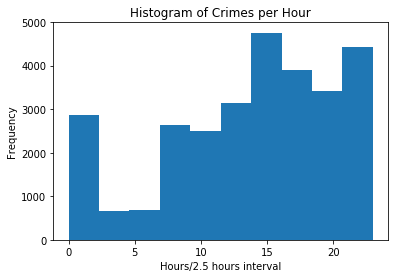

In [9]:
### How do incidents vary by time of day?

df['Time'].plot(kind='hist')
plt.title('Histogram of Crimes per Hour')
plt.ylabel('Frequency')
plt.xlabel('Hours/2.5 hours interval') #bins separated by 2.5 hours
plt.show()

#From the histogram of crimes per hour, it is possible to infer that the highest frequency of crime rate would be between 15:00-18:30 and the lowest would be between 2:30-7:30 in the city 
#San Francisco. 

In [6]:
#Which incidents are most common at mid day? 
df1=df[(df['Time']<'13') & (df['Time']>='12')]
df1.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
186,140742665,ASSAULT,BATTERY,Sunday,08/31/2014,12:51,INGLESIDE,NONE,900 Block of DUNCAN ST,-122.442156,37.745185,"(37.7451850943238, -122.442155766765)",14074266504134
187,140733078,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,12:20,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",14073307806244
188,140732901,ASSAULT,BATTERY,Sunday,08/31/2014,12:19,INGLESIDE,"ARREST, BOOKED",0 Block of MORSE ST,-122.437470,37.713453,"(37.7134528493947, -122.437469844324)",14073290104134
189,140732901,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,08/31/2014,12:19,INGLESIDE,"ARREST, BOOKED",0 Block of MORSE ST,-122.437470,37.713453,"(37.7134528493947, -122.437469844324)",14073290115200
190,146176602,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,12:16,TARAVAL,NONE,1200 Block of 45TH AV,-122.505122,37.763252,"(37.7632523230871, -122.505121700447)",14617660206244


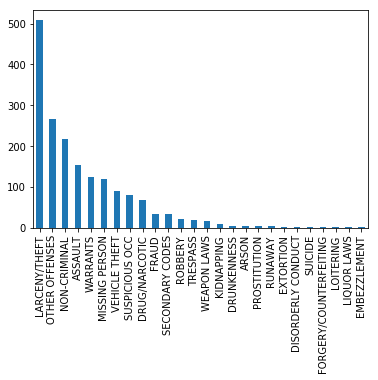

In [14]:
df1['Category'].value_counts().plot(kind='bar')

#From the bar chart it is possible to observe that the most common crimes at mid day are Theft, Other offenses, non-criminal and assault.

In [19]:
#During what periods of the day are robberies most common?
df2=df[df['Category']=="ROBBERY"]
df2

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
108,140733551,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Sunday,08/31/2014,18:18,CENTRAL,"ARREST, BOOKED",300 Block of POWELL ST,-122.408384,37.787827,"(37.7878271137225, -122.408384275542)",14073355103044
118,140733545,ROBBERY,ROBBERY ON THE STREET WITH A KNIFE,Sunday,08/31/2014,17:50,MISSION,NONE,500 Block of DOLORES ST,-122.426037,37.759420,"(37.759419804663, -122.426036566526)",14073354503012
247,140749558,ROBBERY,ROBBERY ON THE STREET WITH A DANGEROUS WEAPON,Sunday,08/31/2014,06:30,INGLESIDE,NONE,0 Block of ARLETA AV,-122.403663,37.712696,"(37.7126960034611, -122.40366319182)",14074955803013
259,140732581,ROBBERY,ROBBERY ON THE STREET WITH A KNIFE,Sunday,08/31/2014,05:00,BAYVIEW,NONE,LANE ST / SHAFTER AV,-122.390730,37.731039,"(37.7310386910994, -122.390729985082)",14073258103012
303,140731834,ROBBERY,ROBBERY OF A SERVICE STATION WITH BODILY FORCE,Saturday,08/30/2014,23:34,NORTHERN,NONE,1800 Block of LOMBARD ST,-122.431978,37.800479,"(37.8004790843579, -122.431977680518)",14073183403034
318,140731680,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Saturday,08/30/2014,22:09,INGLESIDE,NONE,500 Block of ALEMANY BL,-122.421305,37.732164,"(37.7321638759455, -122.421305348396)",14073168003011
714,140732973,ROBBERY,ROBBERY OF A RESIDENCE WITH BODILY FORCE,Friday,08/29/2014,21:00,BAYVIEW,NONE,3RD ST / PALOU AV,-122.390972,37.734015,"(37.7340152180723, -122.390971734551)",14073297303054
715,140732973,ROBBERY,ATTEMPTED ROBBERY RESIDENCE WITH BODILY FORCE,Friday,08/29/2014,21:00,BAYVIEW,NONE,3RD ST / PALOU AV,-122.390972,37.734015,"(37.7340152180723, -122.390971734551)",14073297303454
725,140728148,ROBBERY,ATTEMPTED ROBBERY ON THE STREET WITH A KNIFE,Friday,08/29/2014,20:15,TENDERLOIN,NONE,300 Block of TURK ST,-122.414901,37.782742,"(37.7827419623926, -122.414900544562)",14072814803412
986,140726108,ROBBERY,ROBBERY ON THE STREET WITH A DANGEROUS WEAPON,Friday,08/29/2014,04:51,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / LARKIN ST,-122.417710,37.784236,"(37.7842362877887, -122.417710344726)",14072610803013


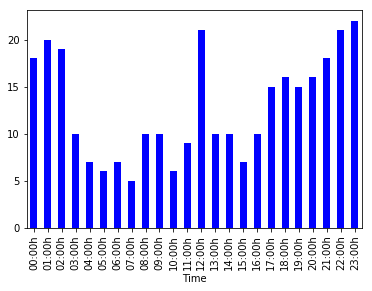

In [33]:
df2.set_index('Time', drop=False, inplace=True)
df2 = df2['Time'].groupby(pd.Grouper(freq='60Min')).count()
ax = df2.plot(kind='bar', color='b')
ticklabels = df2.index.strftime('%H:%Mh')
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(ticklabels))
plt.show()

#From the bar chart we can see that robberies are more common between 0:00h-02:00h, at mid day and between 22:00h-23:00h.

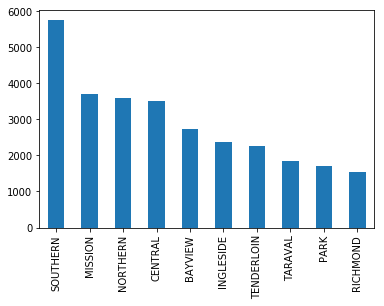

In [73]:
#Which are the districts with more crimes in SF?
df3 = df['PdDistrict'].value_counts()
df3.plot(kind = 'bar')

#From the bar chart we can observe that Southern and Mission are the most dangerous districts in San Francisco while Park and Richmond are the least dangerous.

In [77]:
df_week=df.groupby('DayOfWeek', axis=0).count()
df_week.head()

,IncidntNum,Category,Descript,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
DayOfWeek,,,,,,,,,,,,
Friday,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451
Monday,4005,4005,4005,4005,4005,4005,4005,4005,4005,4005,4005,4005
Saturday,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319
Sunday,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218
Thursday,3968,3968,3968,3968,3968,3968,3968,3968,3968,3968,3968,3968


Text(0.5, 1.0, 'Rate of Crime by Day of Week')

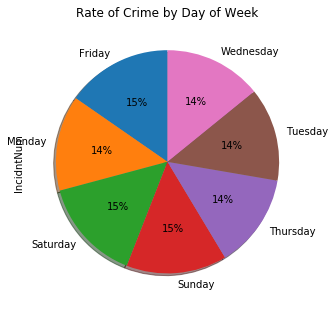

In [86]:
#In which days crime rates are higher?
df_week['IncidntNum'].plot(kind='pie',
figsize=(5,6),autopct='%1.0f%%',
startangle=90,shadow=True)
plt.title('Rate of Crime by Day of Week')
#From the pie chart we can say that there are 3% more crime in friday and weekends than in labor days